<a href="https://colab.research.google.com/github/SairamS28/SairamS28/blob/main/Jamboree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Context**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

##**How can you help here?**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.tools.eval_measures import rmse

In [ ]:
Jamboree=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [ ]:
Jamboree.shape # 500 rows and 9 colums

(500, 9)

In [ ]:
Jamboree.info()#Research is yes or no. So will change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
Jamboree.describe(include="all")#Toefl avg is 108 nicee and gre is 316. average university Rating and more research experience

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
Jamboree.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
Jamboree

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


<Axes: >

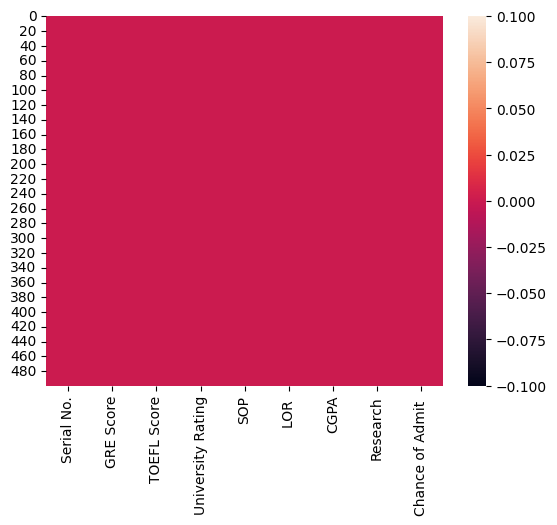

In [ ]:
sns.heatmap(Jamboree.isna()) #No null values

In [ ]:
Jamboree.duplicated().sum()# No duplicates niceee. Less work

0

<Axes: title={'center': 'University Rating'}, ylabel='Frequency'>

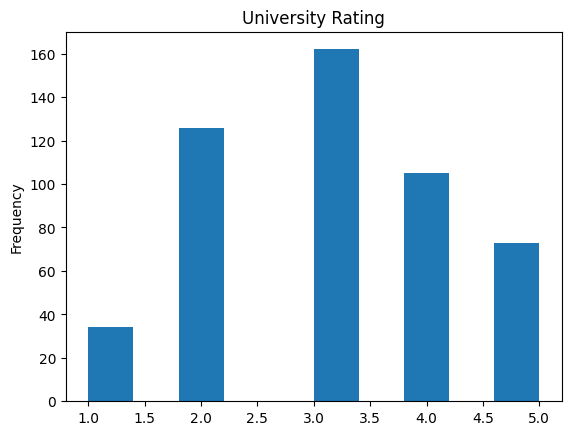

In [ ]:
Jamboree['University Rating'].plot(kind='hist', title='University Rating')# 3 is average

<Axes: title={'center': 'TOEFL Score'}, ylabel='Frequency'>

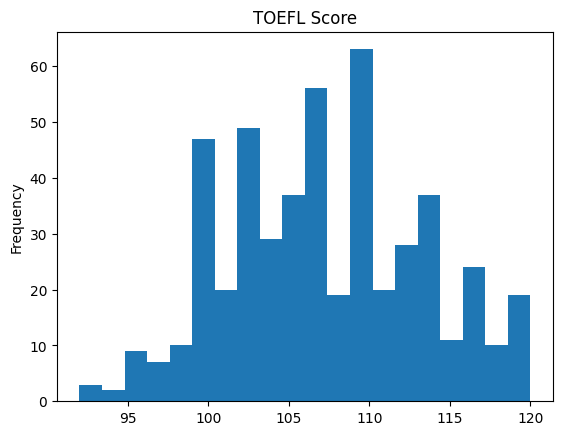

In [ ]:
Jamboree['TOEFL Score'].plot(kind='hist', bins=20, title='TOEFL Score')#nice toefl scores

<Axes: title={'center': 'GRE Score'}, ylabel='Frequency'>

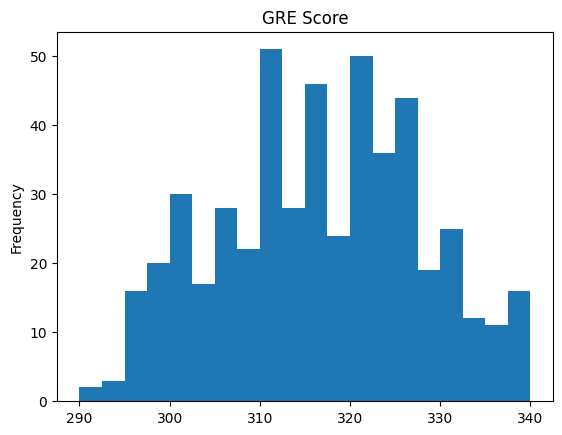

In [ ]:
Jamboree['GRE Score'].plot(kind='hist', bins=20, title='GRE Score')#good gre scores

In [ ]:
Jamboree["Research"]=Jamboree["Research"].replace([0,1],["False","True"])# it seems this is for research experience so changed it to categorical

In [ ]:
Jamboree.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,True,0.92
1,2,324,107,4,4.0,4.5,8.87,True,0.76
2,3,316,104,3,3.0,3.5,8.00,True,0.72
3,4,322,110,3,3.5,2.5,8.67,True,0.80
4,5,314,103,2,2.0,3.0,8.21,False,0.65


<Axes: xlabel='count', ylabel='Research'>

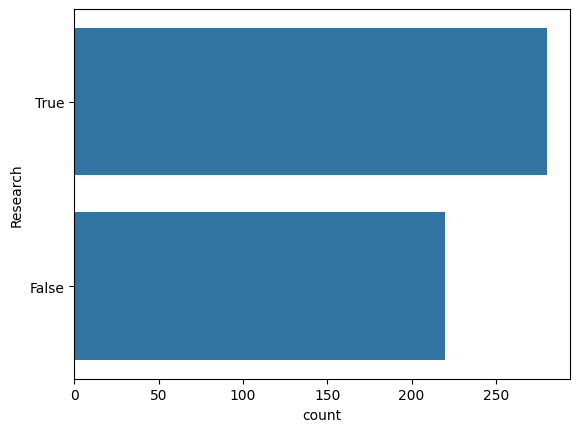

In [ ]:
sns.countplot(Jamboree["Research"])

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

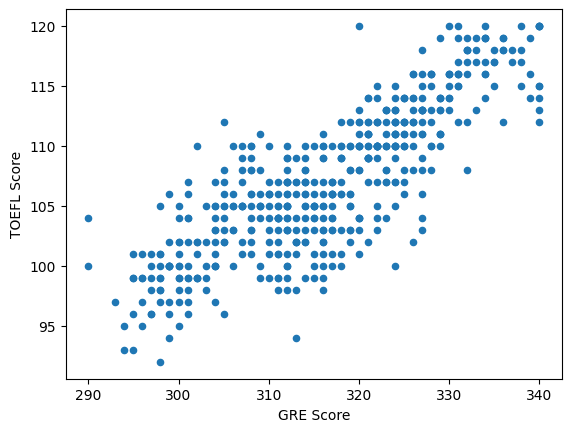

In [ ]:
Jamboree.plot(kind='scatter', x='GRE Score', y='TOEFL Score')

<ipython-input-233-96149719ee13>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Jamboree.corr(),annot=True)


<Axes: >

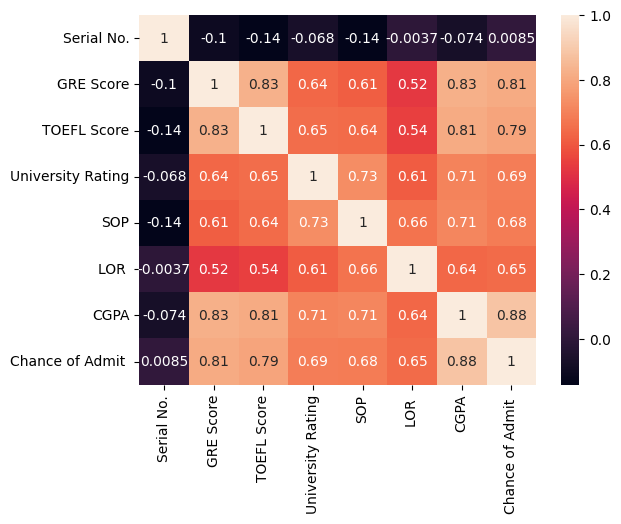

In [ ]:
sns.heatmap(Jamboree.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Jamboree["Research_Encoding"] = le.fit_transform(Jamboree["Research"])
Jamboree.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Research_Encoding
0,1,337,118,4,4.5,4.5,9.65,True,0.92,1
1,2,324,107,4,4.0,4.5,8.87,True,0.76,1
2,3,316,104,3,3.0,3.5,8.00,True,0.72,1
3,4,322,110,3,3.5,2.5,8.67,True,0.80,1
4,5,314,103,2,2.0,3.0,8.21,False,0.65,0


In [ ]:
#For Train Test we need to look what is the most important column here it is Chance of Admit.
X = Jamboree.drop('Chance of Admit ', axis=1)
y = Jamboree['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# non_numeric_train = X_train.select_dtypes(include=["object"]).columns.tolist()
# non_numeric_test = X_test.select_dtypes(include=["object"]).columns.tolist()

# if len(non_numeric_train) > 0 or len(non_numeric_test) > 0:
#     raise ValueError("Non-numeric values found in X_train or X_test.")

In [ ]:
#Research is giving issues True or false, So Remove it

new_X = Jamboree.drop(['Chance of Admit ', 'Research'], axis=1)
new_y = Jamboree['Chance of Admit ']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)
new_X_train.shape,new_X_test.shape,new_y_train.shape,new_y_test.shape


((400, 8), (100, 8), (400,), (100,))

In [ ]:
new_X.shape,new_y.shape

((500, 8), (500,))

In [ ]:
non_numeric_train = new_X_train.select_dtypes(include=["object"]).columns.tolist()
non_numeric_test = new_X_test.select_dtypes(include=["object"]).columns.tolist()

if len(non_numeric_train) > 0 or len(non_numeric_test) > 0:
    raise ValueError("Non-numeric values found in X_train or X_test.")

In [ ]:
scaler = StandardScaler()
new_X_train_scaled = scaler.fit_transform(new_X_train)
new_X_test_scaled = scaler.transform(new_X_test)

In [ ]:
#constant sm
X_sm=sm.add_constant(new_X_train_scaled)

In [ ]:
print(X_sm.shape)
print(new_y_train.shape)

(400, 9)
(400,)


In [ ]:
#Linear Regression
model=sm.OLS(new_y_train,X_sm)
results=model.fit()
print(results.summary())#x4 has 0.523 p value so we drop it

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     236.4
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          1.20e-144
Time:                        05:44:59   Log-Likelihood:                 570.60
No. Observations:                 400   AIC:                            -1123.
Df Residuals:                     391   BIC:                            -1087.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    246.426      0.0

In [ ]:
print("Parameters: ", results.params)
print("Standard errors: ", results.bse)
print("Predicted values: ", results.predict())

Parameters:  const    0.724175
x1       0.012549
x2       0.027184
x3       0.020900
x4       0.003014
x5       0.004171
x6       0.013763
x7       0.065502
x8       0.011077
dtype: float64
Standard errors:  const    0.002939
x1       0.003013
x2       0.006228
x3       0.005662
x4       0.004713
x5       0.004938
x6       0.004163
x7       0.006360
x8       0.003627
dtype: float64
Predicted values:  [0.79256603 0.76238865 0.62319147 0.67774889 0.6604999  0.53243669
 0.73020252 0.8034184  0.64237763 0.67777263 0.63323708 0.9697459
 0.85294206 0.9515628  0.4837079  0.82219634 0.66872245 0.88536487
 0.48194573 0.66770925 0.71374102 0.88370727 0.73045734 0.73768649
 0.69185485 0.69223583 0.59007015 0.98739354 0.83400978 0.51957488
 0.70479713 0.71476129 0.86177358 0.51932702 0.81866861 0.49024508
 0.82175359 0.94285687 0.64632803 0.67791622 0.78276649 0.61695716
 0.84065656 0.51415036 0.94845036 0.65599628 0.94608296 0.78467904
 0.64426069 0.73106859 0.85699806 0.64461634 0.81443942 0.698

In [ ]:
coefs = results.params.to_numpy()
col_names = new_X.columns

print("Column Name :","Coefficient")
for i in range(len(col_names)):
  print(f"{col_names[i]} : {coefs[i]}")


Column Name : Coefficient
Serial No. : 0.7241750000000005
GRE Score : 0.01254946349948077
TOEFL Score : 0.027184129343280072
University Rating : 0.020899871211277475
SOP : 0.00301374676490908
LOR  : 0.004171259310325054
CGPA : 0.01376289436751859
Research_Encoding : 0.06550221961130182


In [ ]:
X_train2=new_X_train.drop('SOP',axis=1)
X_test2=new_X_test.drop('SOP',axis=1)
new_X_train_2_scaled = scaler.fit_transform(X_train2)
new_X_X_test_2_scaled = scaler.fit_transform(X_test2)
X_sm2=sm.add_constant(new_X_train_2_scaled)

model2=sm.OLS(new_y_train,X_sm2)
results2=model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     270.3
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          1.00e-145
Time:                        05:44:59   Log-Likelihood:                 570.23
No. Observations:                 400   AIC:                            -1124.
Df Residuals:                     392   BIC:                            -1093.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    246.516      0.0

In [ ]:
# prompt: Perform VIF for the above data
vif = pd.DataFrame()
vif['features'] = X_train2.columns
vif['vif_value'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]

vif['vif_value'] = round(vif['vif_value'], 2)
vif = vif.sort_values(by = "vif_value", ascending = False)
print(vif)


            features  vif_value
1          GRE Score    1240.01
2        TOEFL Score    1144.71
5               CGPA     889.57
4               LOR       27.75
3  University Rating      17.55
0         Serial No.       4.23
6  Research_Encoding       2.81


In [ ]:
X_train3 = X_train2.drop('GRE Score', axis=1)
X_test3 = X_test2.drop('GRE Score', axis=1)

# Scale the data again
new_X_train_3_scaled = scaler.fit_transform(X_train3)
new_X_test_3_scaled = scaler.transform(X_test3)

# Add a constant term to the data
X_sm3 = sm.add_constant(new_X_train_3_scaled)

# Fit the model again
model3 = sm.OLS(new_y_train, X_sm3)
results3 = model3.fit()

# Calculate VIF values again
vif = pd.DataFrame()
vif['features'] = X_train3.columns
vif['vif_value'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]

vif['vif_value'] = round(vif['vif_value'], 2)
vif = vif.sort_values(by="vif_value", ascending=False)

print(vif)

            features  vif_value
4               CGPA     692.42
1        TOEFL Score     605.03
3               LOR       26.83
2  University Rating      15.62
0         Serial No.       4.14
5  Research_Encoding       2.80


In [ ]:
X_train4 = X_train3.drop('CGPA', axis=1)
X_test4 = X_test3.drop('CGPA', axis=1)

# Scale the data again
new_X_train_4_scaled = scaler.fit_transform(X_train4)
new_X_test_4_scaled = scaler.transform(X_test4)

# Add a constant term to the data
X_sm4 = sm.add_constant(new_X_train_4_scaled)

# Fit the model again
model4 = sm.OLS(new_y_train, X_sm4)
results4 = model4.fit()

# Calculate VIF values again
vif = pd.DataFrame()
vif['features'] = X_train4.columns
vif['vif_value'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]

vif['vif_value'] = round(vif['vif_value'], 2)
vif = vif.sort_values(by="vif_value", ascending=False)

print(vif)

            features  vif_value
3               LOR       25.08
1        TOEFL Score      22.86
2  University Rating      15.26
0         Serial No.       4.08
4  Research_Encoding       2.78


In [ ]:
X_train5 = X_train4.drop('LOR ', axis=1)
X_test5 = X_test4.drop('LOR ', axis=1)

# Scale the data again
new_X_train_5_scaled = scaler.fit_transform(X_train5)
new_X_test_5_scaled = scaler.transform(X_test5)

# Add a constant term to the data
X_sm5 = sm.add_constant(new_X_train_5_scaled)

# Fit the model again
model5 = sm.OLS(new_y_train, X_sm5)
results5 = model5.fit()

# Calculate VIF values again
vif = pd.DataFrame()
vif['features'] = X_train5.columns
vif['vif_value'] = [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]

vif['vif_value'] = round(vif['vif_value'], 2)
vif = vif.sort_values(by="vif_value", ascending=False)

print(vif)

            features  vif_value
1        TOEFL Score      14.38
2  University Rating      11.99
0         Serial No.       4.05
3  Research_Encoding       2.77


In [ ]:
X_train6 = X_train5.drop('TOEFL Score', axis=1)
X_test6 = X_test5.drop('TOEFL Score', axis=1)

# Scale the data again
new_X_train_6_scaled = scaler.fit_transform(X_train6)
new_X_test_6_scaled = scaler.transform(X_test6)

# Add a constant term to the data
X_sm6 = sm.add_constant(new_X_train_6_scaled)

# Fit the model again
model6 = sm.OLS(new_y_train, X_sm6)
results6 = model6.fit()

# Calculate VIF values again
vif = pd.DataFrame()
vif['features'] = X_train6.columns
vif['vif_value'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]

vif['vif_value'] = round(vif['vif_value'], 2)
vif = vif.sort_values(by="vif_value", ascending=False)

print(vif)


            features  vif_value
1  University Rating       4.59
0         Serial No.       2.87
2  Research_Encoding       2.77


In [ ]:
np.mean(results.resid)#Mean of Residuals

-3.948230631323213e-16

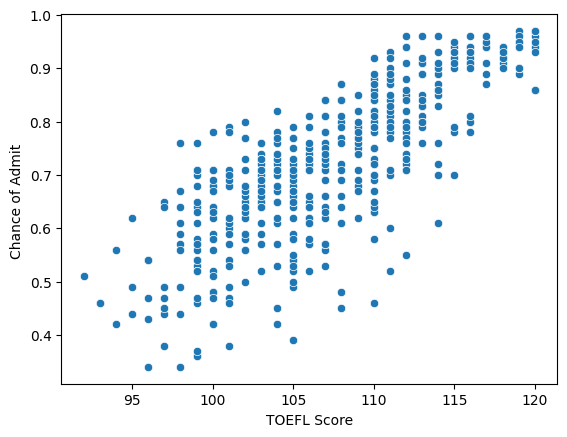

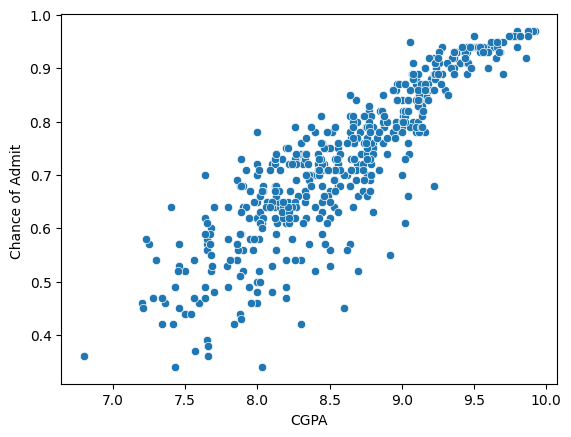

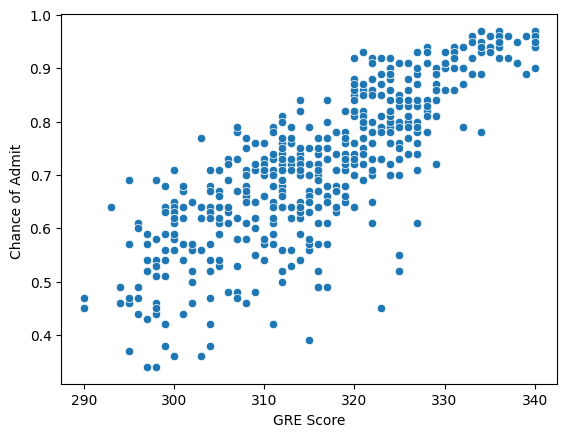

In [ ]:
# prompt: perform scatterplot for dependents and independent variables  for toefl,cgpa,gre

import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot for TOEFL and Chance of Admit
sns.scatterplot(data=Jamboree, x="TOEFL Score", y="Chance of Admit ")
plt.show()

# Scatterplot for CGPA and Chance of Admit
sns.scatterplot(data=Jamboree, x="CGPA", y="Chance of Admit ")
plt.show()

# Scatterplot for GRE and Chance of Admit
sns.scatterplot(data=Jamboree, x="GRE Score", y="Chance of Admit ")
plt.show()

#seems like CGPA,TOEFl and GRE scores are important

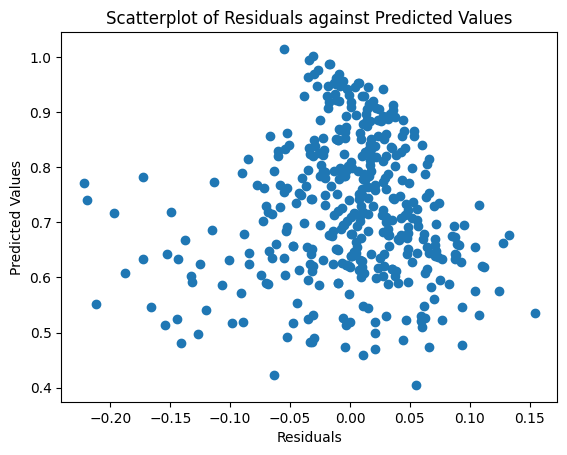

In [ ]:
# Create a scatterplot of residuals against predicted values
plt.scatter(results.resid, results.predict())
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of Residuals against Predicted Values')
plt.show()


In [ ]:
#Goldfeld-Quandt test
goldfeld_quandt_test = het_goldfeldquandt(results.resid, results.model.exog)

# Print the results of the test
print("Goldfeld-Quandt test results:")
print("F-statistic:", goldfeld_quandt_test[0])
print("p-value:", goldfeld_quandt_test[1])

# Interpret the results
if goldfeld_quandt_test[1] < 0.05:
    print("Heteroscedasticity is present in the data.")
else:
    print("Heteroscedasticity is not present in the data.")

#Heteroscdasticity


Goldfeld-Quandt test results:
F-statistic: 0.9478187877024886
p-value: 0.6442421495781673
Heteroscedasticity is not present in the data.


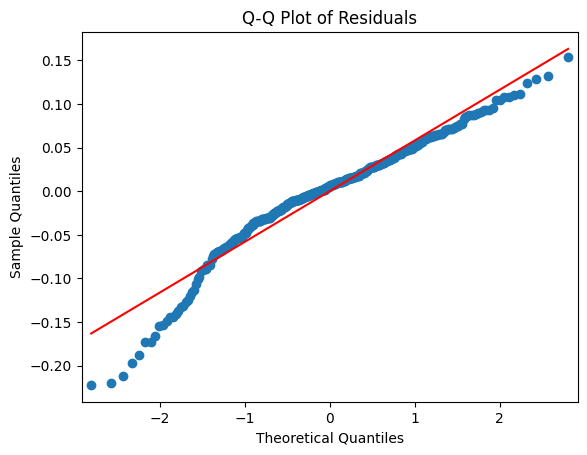

In [ ]:
import matplotlib.pyplot as plt
# Create a Q-Q plot of the residuals
sm.qqplot(results.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


In [ ]:
#MSE
print("MSE",results.mse_model)
#R2
print("R2",results.rsquared)
#R2 Adj
print("R2 adj",results.rsquared_adj)

MSE 0.8166064010827414
R2 0.8286710487778687
R2 adj 0.8251655970904593


In [ ]:
rmse = rmse(new_y_train, results.predict())
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.05810930522166972


In [ ]:
MAE=sm.tools.eval_measures.meanabs(new_y_train, results.predict())
print(" Mean Absolute Error:", MAE)


 Mean Absolute Error: 0.04224568147107755


##Findings


*   Chance of Admission improves with GRE,TOEFL and CGPA and not so much with Research or not and SOP and LOR.
*   There is Heteroskedasticity present in data which shows inconsistent data.
*   QQ plot shows that data is not normally distributed
*   RMSE score is 0.05 which is good and R2 score is .82 which means models explains Target variable well using dependent data.A higher score  indicates a better fit





## Recommenadation



1.   GRE,CGPA and TOEFL are important for improving change of Admission
2.   Data is inconsistent and not normalised so it would better to rerun model after more data. This is not always the best choice, but good data is needed for model

